# Game of Life

#### Nombre : KLEBER FERNANDO PUCHA ORTIZ

# Juego de la vida

Este juego fue diseñado por el matemático británico John Horton Conway en 1970. Este es un juego para cero jugadores, lo que significa que solo necesitamos una entrada inicial, y luego podemos observar cómo evoluciona la configuración. Hay muchos patrones de interés sobre The Game of Life. [1] Las personas juegan la Vida en una cuadrícula bidimensional de celdas cuadradas, cada una de las cuales se encuentra en uno de dos estados posibles, vivo o muerto. La plaza interactuará con sus ocho vecinos. Las reglas para cada actualización son las siguientes [1]:

 1. Cualquier célula viva con menos de dos vecinos vivos muere 
 2. Cualquier célula viva con dos o tres vecinos vivos vive 
 3. Cualquier célula viva con más de tres vecinos vivos muere 
 4. Cualquier célula muerta con exactamente tres vecinos vivos cobra vida

Más información en Game of Life En este proyecto, se analizarán ciertos patrones utilizando el juego de la vida de Conway, todos los patrones deberían ser similares en algunas características, pero al mismo tiempo ser diferentes entre sí, estos patrones se pueden usar en seguridad y Sería importante saber cuál de las muestras utilizadas es la más compleja de todas.

In [4]:
# Se importan las bibliotecas necesarias.

import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

In [5]:
# La matriz se amplía para analizar a los vecinos.

def exten(mat): 
    n = len(mat) 
    ex = np.zeros((n+2,n+2)) 
    ex[1:n+1,1:n+1] = mat 
    return ex

In [6]:
# Se cuentan las células vivas que están alrededor de cada célula.

def veci(i,j, ex): 
    return (ex[i,j-1] + ex[i,j+1] + ex[i-1,j-1] + (ex[i-1,j] + ex[i-1,j+1] + ex[i+1,j-1]) + (ex[i+1,j]+ ex[i+1,j+1]))


In [7]:
# En este paso las reglas del juego de la vida se aplican a cada celda.

def reglas(mat): 
    n = len(mat) 
    ex = exten(mat) 
    nmat = np.zeros((n,n)) 
    for i in range(1,n+1): 
        for j in range(1,n+1): 
            s = veci(i,j,ex) 
            if s>3 or s <=1: 
                nmat[i-1,j-1] = 0 
            if s == 3 and mat[i-1,j-1]== 0: 
                nmat[i-1,j-1] = 1 
            if (s == 3 or s== 2) and mat[i-1,j-1]== 1: 
                nmat[i-1,j-1] = 1 
    return nmat

In [8]:
# Este método nos permite ejecutar las reglas un cierto número de veces.

def correr(n,ini): 
    pasos = [] 
    pasos.append(ini) 
    g = ini 
    for i in range(n): 
        g = reglas(g) 
        pasos.append(g) 
    return pasos

In [61]:
# De esta manera se crea una muestra:

init = np.zeros((34,34)) 
init[8,5] = 1 
init[9,6] = 1 
init[8,7] = 1 
init[9,8] = 1 
init[8,9] = 1 
init[9,11] = 1 
init[8,12] = 1 
init[9,13] = 1 
init[8,14] = 1 
init[9,15] = 1

init[10,5] = 1 
init[11,6] = 1 
init[10,7] = 1 
init[11,8] = 1 
init[10,9] = 1 
init[11,11] = 1 
init[10,12] = 1 
init[11,13] = 1 
init[10,14] = 1 
init[11,15] = 1


init[20,5] = 1 
init[22,6] = 1 
init[5,7] = 1 
init[5,8] = 1 
init[5,9] = 1 
init[5,11] = 1 
init[5,12] = 1 
init[5,13] = 1 
init[22,14] = 1 
init[20,15] = 1

init[20,5] = 1 
init[22,6] = 1 
init[22,7] = 1 
init[22,8] = 1 
init[23,9] = 1 
init[23,11] = 1 
init[22,12] = 1 
init[22,13] = 1 
init[22,14] = 1 
init[20,15] = 1

In [62]:
# Se llama al método para que realice 5 interacciones con la matriz inicial.

res = correr(5, init)

In [63]:
#  La matriz de la última interacción se imprime en consola.

print (res[5]) 
print (len(res[5]))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
34


In [64]:
# Método que permite graficar una matriz.

def grafmat(mt): 
    n = len(mt) 
    dx = 1/n 
    pieces = [] 
    frame = patches.Rectangle( 
        (0.0, 0.0),1, 1, fill=False, edgecolor="white",linewidth=2) 
    pieces.append(frame) 
    for j in range(n): 
        for i in range(n): 
            if mt[i,j]== 1: 
                p = patches.Rectangle( 
                    (j/n,(n-1-i)/n), dx,dx, edgecolor="Gray", facecolor="black", fill=True, linewidth=2 )
                pieces.append(p) 
            if mt[i,j]== 0:
                p = patches.Rectangle( 
                    (j/n,(n-1-i)/n), dx,dx, edgecolor="Gray", fill=False,linewidth=2) 
                pieces.append(p) 
    return pieces


In [65]:
 def vermat(x): 
        ax1=plt.subplot(111,aspect='equal') 
        shape = grafmat(x) 
        for p in shape: ax1.add_patch(p) 
        plt.axis('off') 
        plt.show()


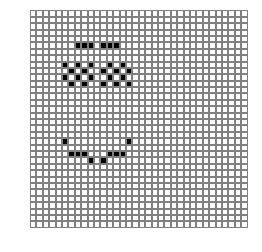

In [66]:
vermat (res[0])

In [67]:
def ver5(v,w,x, y, z): 
    fg = plt.figure(figsize=(20,4)) 
    adj = plt.subplots_adjust(hspace=0.4)
    
    ax0=plt.subplot(151,aspect='equal') 
    shape = grafmat(v) 
    for p in shape: ax0.add_patch(p) 
    plt.axis('off')
    
    ax1=plt.subplot(152,aspect='equal') 
    shape = grafmat(w) 
    for p in shape: ax1.add_patch(p) 
    plt.axis('off')
    
    ax2=plt.subplot(153,aspect='equal')  
    shape = grafmat(x) 
    for p in shape: ax2.add_patch(p) 
    plt.axis('off')
    
    ax3=plt.subplot(154,aspect='equal') 
    shape = grafmat(y) 
    for p in shape: ax3.add_patch(p) 
    plt.axis('off')
    
    ax4=plt.subplot(155,aspect='equal') 
    shape = grafmat(z) 
    for p in shape: ax4.add_patch(p) 
    plt.axis('off')
    plt.show()



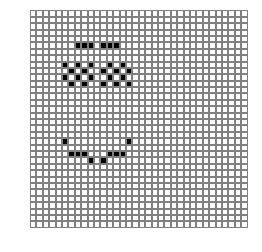

In [68]:
cor= correr(46, init)
vermat(init)

In [45]:
 def base(): 
        Base = np.zeros((34,34)) 
        Base[13,12] = 1 
        Base[12,16] = 1 
        Base[13,20] = 1 
        Base[16,12] = 1 
        Base[17,16] = 1 
        Base[16,20] = 1 
        Base[21,12] = 1 
        Base[20,16] = 1 
        Base[21,20] = 1 
        return Base


In [70]:
m1 = base() 
m1[13,19] = 1 
m1[14,18] = 1 
m1[15,17] = 1 
m1[17,16] = 1 
m1[18,16] = 1 
m1[19,16] = 1 
m1[20,17] = 1 
m1[20,18] = 1 
m1[20,19] = 1
m1[23,19] = 1 
m1[24,18] = 1 
m1[25,17] = 1 
m1[27,16] = 1 
m1[28,16] = 1 
m1[29,16] = 1 
m1[30,17] = 1 
m1[30,18] = 1 
m1[30,19] = 1

m2 = base() 
m2[13,13] = 1
m2[14,14] = 1 
m2[15,15] = 1 
m2[15,17] = 1 
m2[14,18] = 1 
m2[13,19] = 1 
m2[13,20] = 1 
m2[14,20] = 1 
m2[15,20] = 1
m2[14,13] = 1
m2[15,14] = 1 
m2[16,15] = 1 
m2[17,17] = 1 
m2[14,18] = 1 
m2[13,19] = 1 
m2[13,21] = 1 
m2[14,22] = 1 
m2[15,23] = 1

m3 = base() 
m3[16,13] = 1 
m3[16,14] = 1 
m3[16,15] = 1 
m3[13,16] = 1 
m3[14,16] = 1 
m3[15,16] = 1 
m3[12,17] = 1 
m3[12,18] = 1 
m3[12,19] = 1

m4 = base() 
m4[13,13] = 1 
m4[14,14] = 1 
m4[15,15] = 1 
m4[16,13] = 1 
m4[16,14] = 1 
m4[16,15] = 1
m4[17,13] = 1 
m4[18,14] = 1 
m4[19,15] = 1

m5 = base() 
m5[17,12] = 1 
m5[18,12] = 1 
m5[19,12] = 1 
m5[20,13] = 1 
m5[20,14] = 1 
m5[20,15] = 1 
m5[17,16] = 1 
m5[18,16] = 1 
m5[19,16] = 1





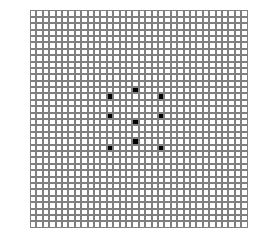

In [71]:
vermat (base())

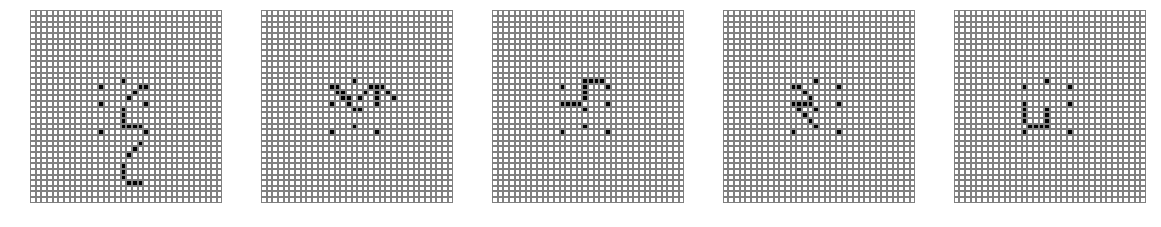

In [72]:
ver5 (m1,m2,m3,m4,m5)

RESULTADOS
We show the 5 last interactions of each sample:


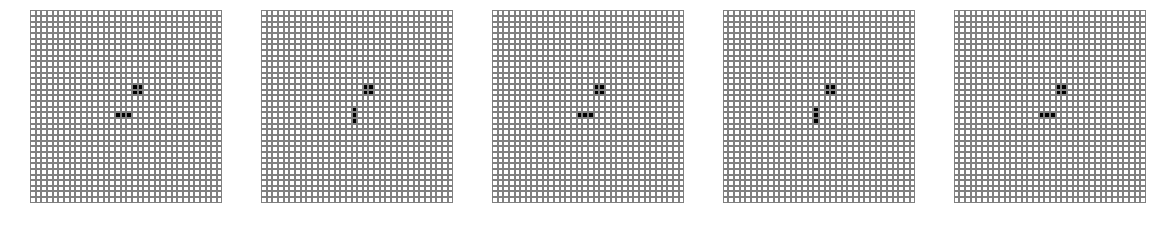

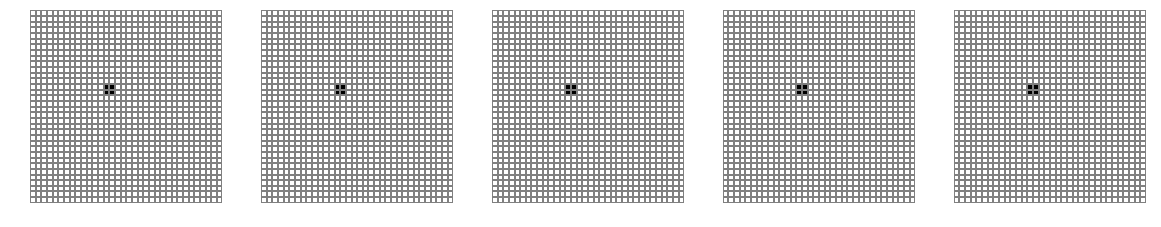

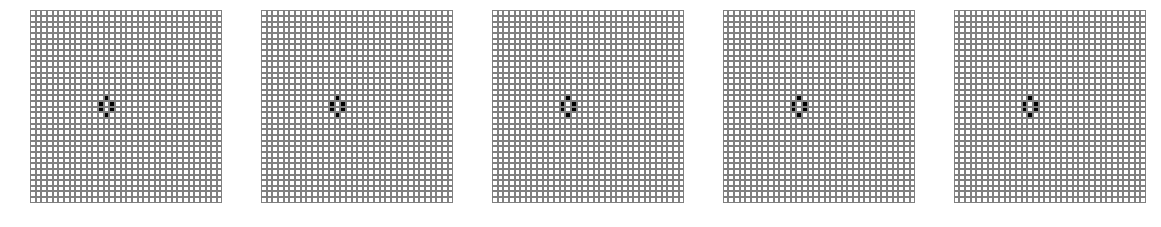

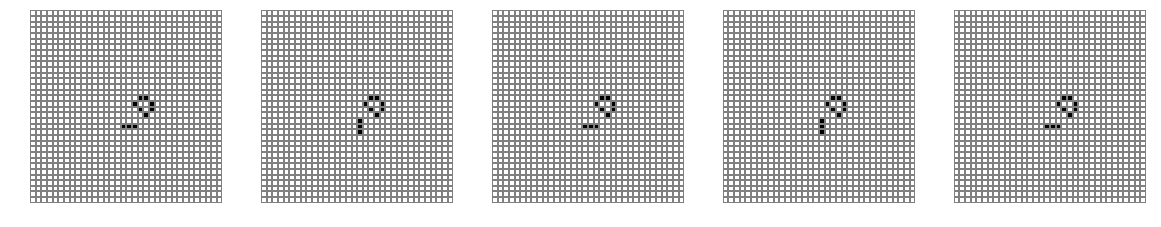

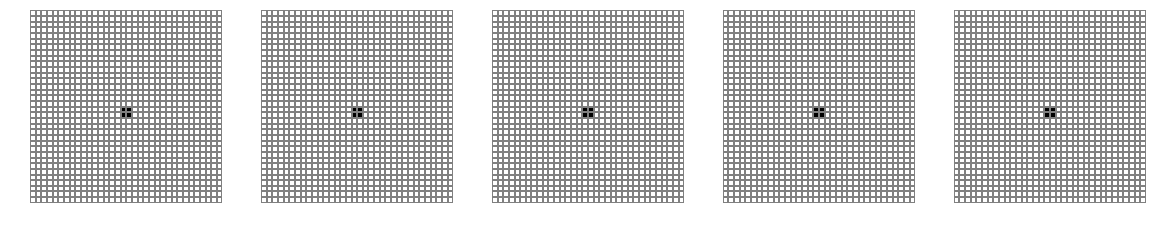

In [51]:
muestras = [m1,m2,m3,m4,m5] 
resultados = []
for m in muestras: 
    r = correr(300, m) 
    resultados.append(r)
    
print("RESULTADOS") 
print("We show the 5 last interactions of each sample:")

i = 1 
for r in resultados: 
    ver5 (r[len(r)-5],r[len(r)-4],r[len(r)-3],r[len(r)-2],r[len(r)-1]) 
                                                                                                                                        
    i = i + 1



Muestra  1


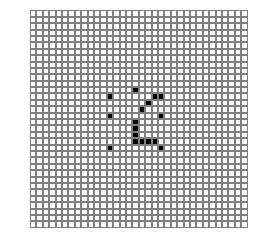

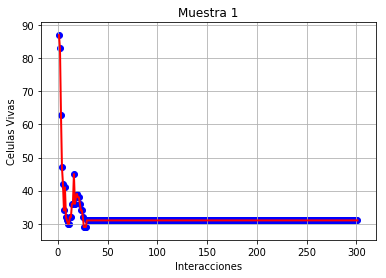

Muestra  2


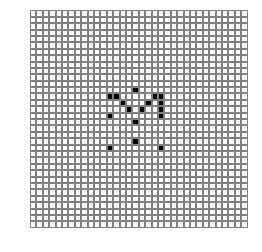

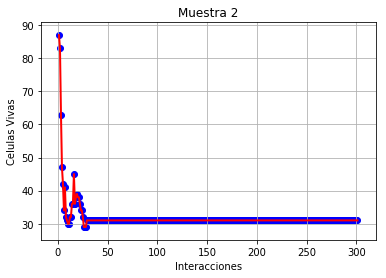

Muestra  3


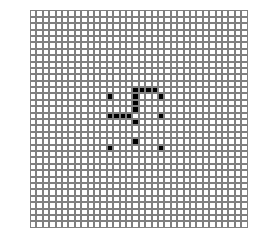

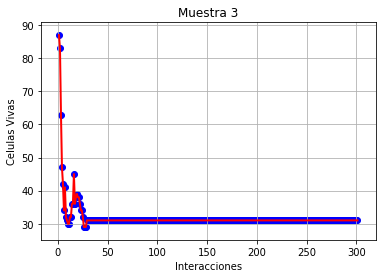

Muestra  4


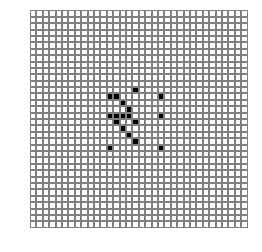

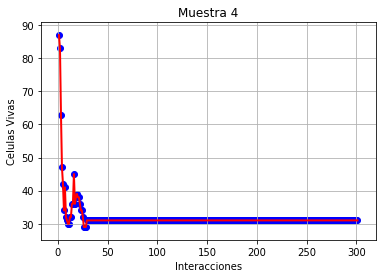

Muestra  5


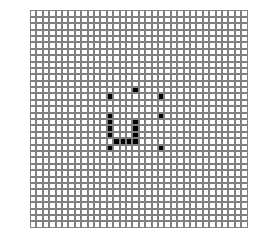

[(1, 87), (2, 83), (3, 63), (4, 47), (5, 42), (6, 34), (7, 41), (8, 32), (9, 31), (10, 30), (11, 30), (12, 32), (13, 32), (14, 36), (15, 36), (16, 45), (17, 36), (18, 38), (19, 39), (20, 38), (21, 38), (22, 36), (23, 34), (24, 34), (25, 32), (26, 29), (27, 29), (28, 29), (29, 31), (30, 31), (31, 31), (32, 31), (33, 31), (34, 31), (35, 31), (36, 31), (37, 31), (38, 31), (39, 31), (40, 31), (41, 31), (42, 31), (43, 31), (44, 31), (45, 31), (46, 31), (47, 31), (48, 31), (49, 31), (50, 31), (51, 31), (52, 31), (53, 31), (54, 31), (55, 31), (56, 31), (57, 31), (58, 31), (59, 31), (60, 31), (61, 31), (62, 31), (63, 31), (64, 31), (65, 31), (66, 31), (67, 31), (68, 31), (69, 31), (70, 31), (71, 31), (72, 31), (73, 31), (74, 31), (75, 31), (76, 31), (77, 31), (78, 31), (79, 31), (80, 31), (81, 31), (82, 31), (83, 31), (84, 31), (85, 31), (86, 31), (87, 31), (88, 31), (89, 31), (90, 31), (91, 31), (92, 31), (93, 31), (94, 31), (95, 31), (96, 31), (97, 31), (98, 31), (99, 31), (100, 31), (101, 3

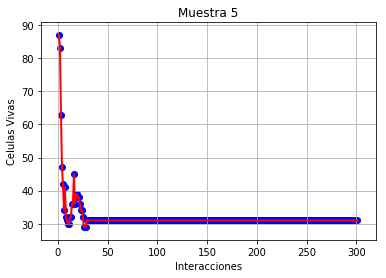

In [73]:
import simpy 
import random 
import matplotlib.pyplot as pp

dms={} 
dm={} 
j = 0 
for r in resultados: 
    j = j + 1 
    i = 0 
    for m in r: 
        i = i + 1 
        for fila in range(len(m)): 
            for columna in range(len(m)): 
                if m[fila][columna] == 1: 
                    if i in dm: 
                        dm[i]=dm[i]+1 
                    else: 
                        dm[i]=1
dms[j]=dm 
dm={}

# Generamos la grafica 

for key, dicm in dms.items(): 
        print ("Muestra ", 1) 
        vermat (muestras[1-1]) 
        datos=sorted(dicm.items()) 
        x, y =zip(*datos) 
        pp.plot(x,y,linewidth=2,color='red') 
        pp.scatter(x,y,color='blue') 
        pp.grid(True) 
        pp.title("Muestra %s" %(1)) 
        pp.xlabel('Interacciones') 
        pp.ylabel('Celulas Vivas')
        pp.show()


for key, dicm in dms.items(): 
    print ("Muestra ", 2) 
    vermat (muestras[2-1]) 
    datos=sorted(dicm.items()) 
    x, y =zip(*datos) 
    pp.plot(x,y,linewidth=2,color='red') 
    pp.scatter(x,y,color='blue') 
    pp.grid(True) 
    pp.title("Muestra %s" %(2)) 
    pp.xlabel('Interacciones') 
    pp.ylabel('Celulas Vivas')
    pp.show()
   

    for key, dicm in dms.items(): 
        print ("Muestra ", 3) 
        vermat (muestras[3-1]) 
        datos=sorted(dicm.items()) 
        x, y =zip(*datos) 
        pp.plot(x,y,linewidth=2,color='red') 
        pp.scatter(x,y,color='blue') 
        pp.grid(True) 
        pp.title("Muestra %s" %(3)) 
        pp.xlabel('Interacciones') 
        pp.ylabel('Celulas Vivas')
        pp.show()
        
        
    for key, dicm in dms.items(): 
        print ("Muestra ", 4) 
        vermat (muestras[4-1]) 
        datos=sorted(dicm.items()) 
        x, y =zip(*datos) 
        pp.plot(x,y,linewidth=2,color='red') 
        pp.scatter(x,y,color='blue') 
        pp.grid(True) 
        pp.title("Muestra %s" %(4)) 
        pp.xlabel('Interacciones') 
        pp.ylabel('Celulas Vivas')
        pp.show()
        
    for key, dicm in dms.items(): 
        print ("Muestra ", key) 
        vermat (muestras[key-1]) 
        datos=sorted(dicm.items())
        print(datos)
        x, y =zip(*datos) 
        pp.plot(x,y,linewidth=2,color='red') 
        pp.scatter(x,y,color='blue') 
        pp.grid(True) 
        pp.title("Muestra %s" %(key)) 
        pp.xlabel('Interacciones') 
        pp.ylabel('Celulas Vivas')
        pp.show()
    